In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
#load the dataset
ds = pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv', encoding='latin1')


In [ ]:
ds.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [ ]:
ds.shape[0]

48895

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
ds.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
ds.isnull().sum()/ds.shape[0]*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [ ]:
ds.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
ds['last_review'] = pd.to_numeric(ds['last_review'], errors='coerce')
ds.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                       float64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# Impute missing values for columns (last_review and reviews_per_month) using the mean
last_review = ds['last_review']
reviews_per_month = ds['reviews_per_month']

mean_last_review = ds['last_review'].mean()
mean_reviews_per_month = ds['reviews_per_month'].mean()

ds['last_review'].fillna(mean_last_review, inplace=True)
ds['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

# Save the dataset with imputed missing values
ds.to_csv("imputed_dataset.csv", index=False)


In [ ]:
#checking for null values in the coloumn last_review , reviews_per_month
ds.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       48895
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Fill missing values in the 'name' , 'host_name'column with "Unknown"
ds['name'].fillna("Unknown", inplace=True)
ds['host_name'].fillna("Unknown", inplace=True)

# Save the dataset with filled missing values
ds.to_csv("filled_dataset.csv", index=False)

In [ ]:
# all the missing values has been cleared
ds.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       48895
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Check for duplicate records
duplicate_rows = ds[ds.duplicated()]
print("Duplicate records:\n", duplicate_rows)

Duplicate records:
 Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [ ]:
# Remove duplicate records
cleaned_ds = ds.drop_duplicates()

# Save the cleaned dataset without duplicates
cleaned_ds.to_csv("cleaned_dataset.csv", index=False)

In [12]:
#Standardizing numerical columns
# Select only numerical columns
numerical_cols = ds.select_dtypes(include=[np.number]).columns

# Instantiate StandardScaler
scaler = StandardScaler()

# Standardize numerical columns containing zero values
for col in numerical_cols:
    col_data = ds[col].values # Use ds here
    if np.any(col_data == 0):
        # Calculate mean and standard deviation, ignoring zero values
        non_zero_data = col_data[col_data != 0]
        mean = np.mean(non_zero_data)
        std_dev = np.std(non_zero_data)

In [11]:

        # Replace zero standard deviation with 1 to prevent division by zero
        if std_dev == 0:
            std_dev = 1

        # Perform standardization
        ds[col] = (col_data - mean) / std_dev

print("Standardized Data:")
print(ds)

Standardized Data:
             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name

In [ ]:
# Standardizing string columns
# Converting all string columns to lowercase
ds['name'] = ds['name'].str.lower().str.strip()
ds['host_name'] = ds['host_name'].str.lower().str.strip()
ds['neighbourhood_group'] = ds['neighbourhood_group'].str.lower().str.strip()
ds['neighbourhood'] = ds['neighbourhood'].str.lower().str.strip()
ds['room_type'] = ds['room_type'].str.lower().str.strip()


# Display the standardized dataset
print(ds)


             id                                               name   host_id  \
0          2539                 clean & quiet apt home by the park      2787   
1          2595                              skylit midtown castle      2845   
2          3647                the village of harlem....new york !      4632   
3          3831                    cozy entire floor of brownstone      4869   
4          5022   entire apt: spacious studio/loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      affordable room in bushwick/east williamsburg   6570630   
48892  36485431            sunny studio at historical neighborhood  23492952   
48893  36485609               43rd st. time square-cozy single bed  30985759   
48894  36487245  trendy duplex in the very heart of hell's kitchen  68119814   

           host_name neighbourhood_grou

In [13]:
#  Identify numeric columns
numeric_cols = ds.select_dtypes(include=[np.number]).columns

# Calculate Z-scores for numeric columns
z_scores = stats.zscore(ds[numeric_cols])

# Convert Z-scores to a DataFrame with the same column names
z_scores_ds = pd.DataFrame(z_scores, columns=numeric_cols)

# Identify outliers using Z-score threshold (e.g., |z| > 3)
threshold = 3
outliers = z_scores_ds.abs() > threshold

# Impute outliers with the median value of the column
ds_imputed = ds.copy()
for column in numeric_cols:
    median_value = ds_imputed[column].median()
    ds_imputed.loc[outliers[column], column] = median_value

# Display the cleaned dataset
print("Original dataset:\n", ds)
print("\nDataset with outliers imputed:\n", ds_imputed)


Original dataset:
              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name

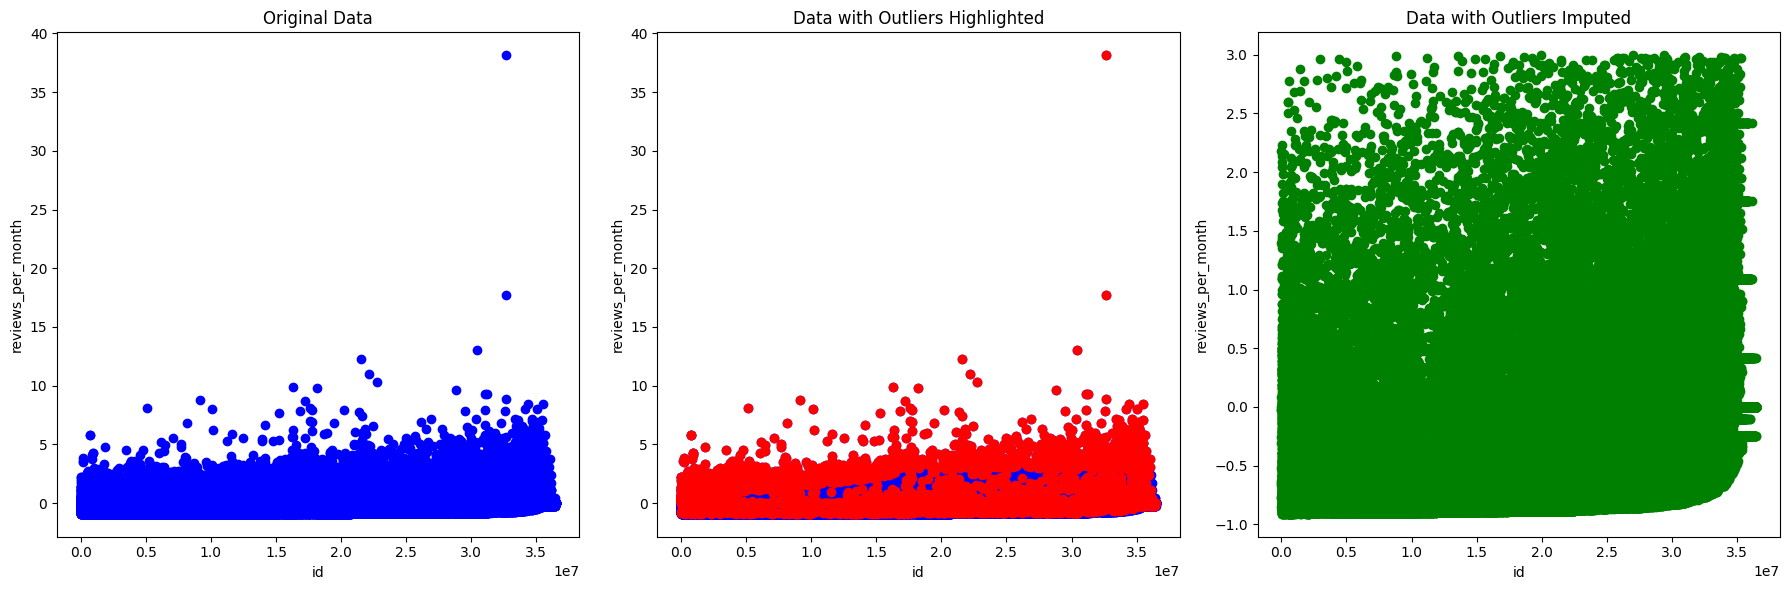

In [ ]:
# Step 5: Visualize the data

# Scatter plot visualization
plt.figure(figsize=(18, 6))

# Original Data
plt.subplot(1, 3, 1)
plt.scatter(ds['id'], ds['reviews_per_month'], color='blue')
plt.title('Original Data')
plt.xlabel('id')
plt.ylabel('reviews_per_month')

# Outliers Highlighted
plt.subplot(1, 3, 2)
plt.scatter(ds['id'], ds['reviews_per_month'], color='blue')
plt.scatter(ds[outliers.any(axis=1)]['id'], ds[outliers.any(axis=1)]['reviews_per_month'], color='red')
plt.title('Data with Outliers Highlighted')
plt.xlabel('id')
plt.ylabel('reviews_per_month')

# Data with Outliers Imputed
plt.subplot(1, 3, 3)
plt.scatter(ds_imputed['id'], ds_imputed['reviews_per_month'], color='green')
plt.title('Data with Outliers Imputed')
plt.xlabel('id')
plt.ylabel('reviews_per_month')

plt.tight_layout()